In [2]:
# conda remove --name SCENIC --all
# conda create --name SCENIC python=3.6.3 
# conda activate SCENIC
# python -m pip install pandas
# git clone https://github.com/aertslab/pycisTopic.git
# cd pycisTopic
# python -m pip install .
# python -m pip install --upgrade pip setuptools
# python -m pip install scanpy
# python -m pip install  pyranges
# python -m pip install requests --ignore-installed certifi
# python -m pip install ray
# python -m pip install tmtoolkit
# python -m pip install gensim
# python -m pip install loomxpy
# python -m pip install pyrle
# python -m pip install polars
# python -m pip  install typing-extensions --upgrade
# python -m pip install pyarrow
# python -m pip install loompy
# python -m pip install pyscenic
# python -m pip install pickle5
# python -m pip install ipykernel
#  python -m pip install pyBigWig
# install jupyter-lab
# mv pycisTopic/ pycisTopic_repo
#git clone https://github.com/aertslab/scenicplus
#cd scenicplus
#pip install .



import warnings
warnings.simplefilter(action='ignore')
import pandas as pd
import scanpy
import os
import requests
import pyranges as pr
import pycisTopic
from pycisTopic.pseudobulk_peak_calling import export_pseudobulk
from pycisTopic.iterative_peak_calling import *
import anndata
import pickle
import pyarrow 
import re
from pycisTopic.lda_models import *
from pycisTopic.cistopic_class import *
import scrublet as scr
from pycisTopic.lda_models import *
from pycisTopic.clust_vis import *



def CountFrequency(my_list):
 
    # Creating an empty dictionary
    freq = {}
    for items in my_list:
        freq[items] = my_list.count(items)
 
    for key, value in freq.items():
        print("% s : % d" % (key, value))
 

outDir="SCENIC_results_MARCH2024/"
tmpDir="/tmp/"
#ray.shutdown()

In [2]:

fragments_dict={'6dpf':"/mnt/ceph/mbp/servers/bioinformatics-platform/home/lper0012/tasks/margo.montandon//countmatrix//6dpf/atac_fragments.tsv.gz",
                '4dpf':"/mnt/ceph/mbp/servers/bioinformatics-platform/home/lper0012/tasks/margo.montandon//countmatrix//4dpf/atac_fragments.tsv.gz",
                '2dpf':"/mnt/ceph/mbp/servers/bioinformatics-platform/home/lper0012/tasks/margo.montandon//countmatrix//2dpf/atac_fragments.tsv.gz"}
fragments_dict

{'6dpf': '/mnt/ceph/mbp/servers/bioinformatics-platform/home/lper0012/tasks/margo.montandon//countmatrix//6dpf/atac_fragments.tsv.gz',
 '4dpf': '/mnt/ceph/mbp/servers/bioinformatics-platform/home/lper0012/tasks/margo.montandon//countmatrix//4dpf/atac_fragments.tsv.gz',
 '2dpf': '/mnt/ceph/mbp/servers/bioinformatics-platform/home/lper0012/tasks/margo.montandon//countmatrix//2dpf/atac_fragments.tsv.gz'}

In [3]:
import pickle

infile = open(outDir + 'cisTopicObject_noDBL.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()


In [4]:
run_umap(cistopic_obj,
                 target  = 'cell', scale=True)

2024-04-04 02:51:55,792 cisTopic     INFO     Running UMAP


In [5]:
cistopic_obj.cell_data

,Dupl_nr_frag,wsnn_res.1.2,nCount_SCT,wsnn_res.0.4,cisTopic_log_nr_frag,wsnn_res.0.2,wsnn_res.1.1,wsnn_res.1.3,Predicted_doublets_fragments,Log_total_nr_frag,...,seurat_clusters,wsnn_res.1.6,Doublet_scores_fragments,wsnn_res.2,pycisTopic_leiden_10_1.2,Seurat_RNA+ATAC_leiden_100_0.1,Seurat_RNA+ATAC_leiden_100_0.2,Seurat_RNA+ATAC_leiden_100_0.5,Seurat_RNA+ATAC_leiden_100_0.8,Seurat_RNA+ATAC_leiden_100_1.2
CCTATTTAGGGATTAG-1-6dpf___6dpf,21180,NaN,NaN,NaN,3.944927,NaN,NaN,NaN,False,4.762468,...,NaN,NaN,0.171355,NaN,11,NaN,NaN,NaN,NaN,NaN
AGGAACCAGTAACCCG-1-6dpf___6dpf,3280,cluster_26,2451.0,cluster_1,3.41162,cluster_0,cluster_26,cluster_27,False,3.941362,...,cluster_5,cluster_29,0.171355,cluster_31,2,1,1,2,2,2
GCTGGTTCAGTTTACG-1-6dpf___6dpf,25519,cluster_30,2142.0,cluster_21,4.271633,cluster_15,cluster_30,cluster_31,False,4.792700,...,cluster_8,cluster_32,0.193277,cluster_34,12,2,4,4,5,5
AGGTTAGAGGGCCATC-1-6dpf___6dpf,5595,cluster_26,1402.0,cluster_1,3.609381,cluster_0,cluster_26,cluster_27,False,4.193152,...,cluster_5,cluster_29,0.219814,cluster_31,10,1,1,2,2,2
GGTTTAATCCCGCATT-1-6dpf___6dpf,6531,cluster_10,2372.0,cluster_6,3.649335,cluster_11,cluster_10,cluster_10,False,4.240998,...,cluster_24,cluster_10,0.219814,cluster_17,10,1,1,2,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGGTTTGTCCCGTTAC-1-2dpf___2dpf,2667,NaN,NaN,NaN,2.612784,NaN,NaN,NaN,False,3.573452,...,NaN,NaN,0.042017,NaN,1,NaN,NaN,NaN,NaN,NaN
TGACCAAGTTGCACAA-1-2dpf___2dpf,2585,cluster_0,1807.0,cluster_0,2.592177,cluster_1,cluster_0,cluster_0,False,3.554973,...,cluster_0,cluster_0,0.094629,cluster_0,1,0,0,0,0,0
CAAACGCGTGCGCGTA-1-2dpf___2dpf,2132,cluster_12,1425.0,cluster_12,2.656098,cluster_9,cluster_12,cluster_12,False,3.524266,...,cluster_2,cluster_12,0.090307,cluster_12,1,0,0,0,1,1
CTATAACCAAGCTTAT-1-2dpf___2dpf,3305,NaN,NaN,NaN,2.706718,NaN,NaN,NaN,False,3.673205,...,NaN,NaN,0.064295,NaN,1,NaN,NaN,NaN,NaN,NaN


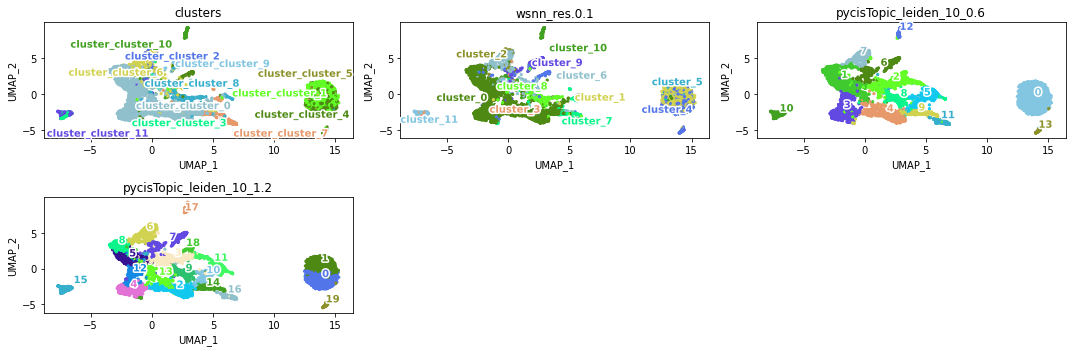

In [6]:
# ATAC clustering
#os.mkdir(outDir+'/visualization')
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['clusters',"wsnn_res.0.1", 'pycisTopic_leiden_10_0.6', 'pycisTopic_leiden_10_1.2'], # Labels from RNA and new clusters
                 target='cell', num_columns=3,
                 text_size=10,
                 dot_size=5,
                 figsize=(15,5),
                 save= outDir + 'visualization/dimensionality_reduction_label.pdf')

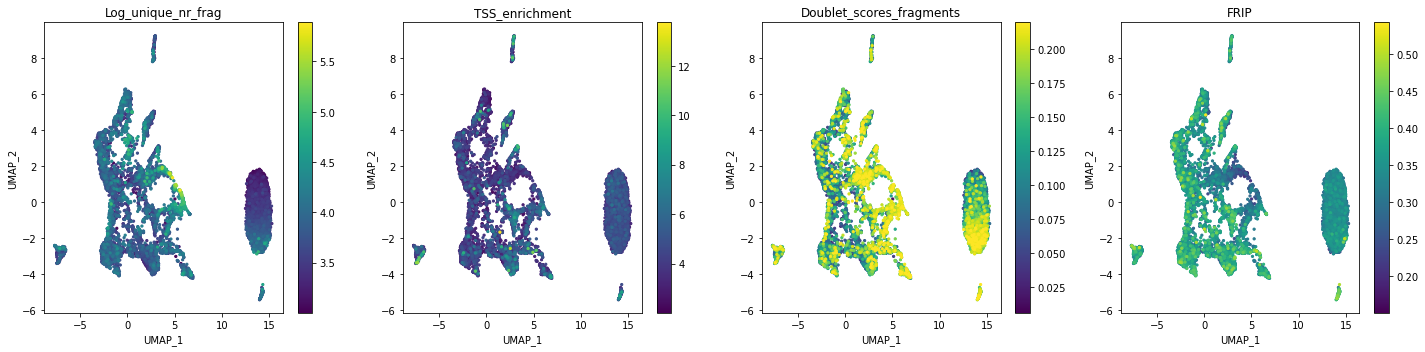

In [7]:
plot_metadata(cistopic_obj,
                 reduction_name='UMAP',
                 variables=['Log_unique_nr_frag', 'TSS_enrichment', 'Doublet_scores_fragments', 'FRIP'],
                 target='cell', num_columns=4,
                 text_size=10,
                 dot_size=5,
                 figsize=(20,5),
                 save= outDir + 'visualization/dimensionality_reduction_number.pdf')

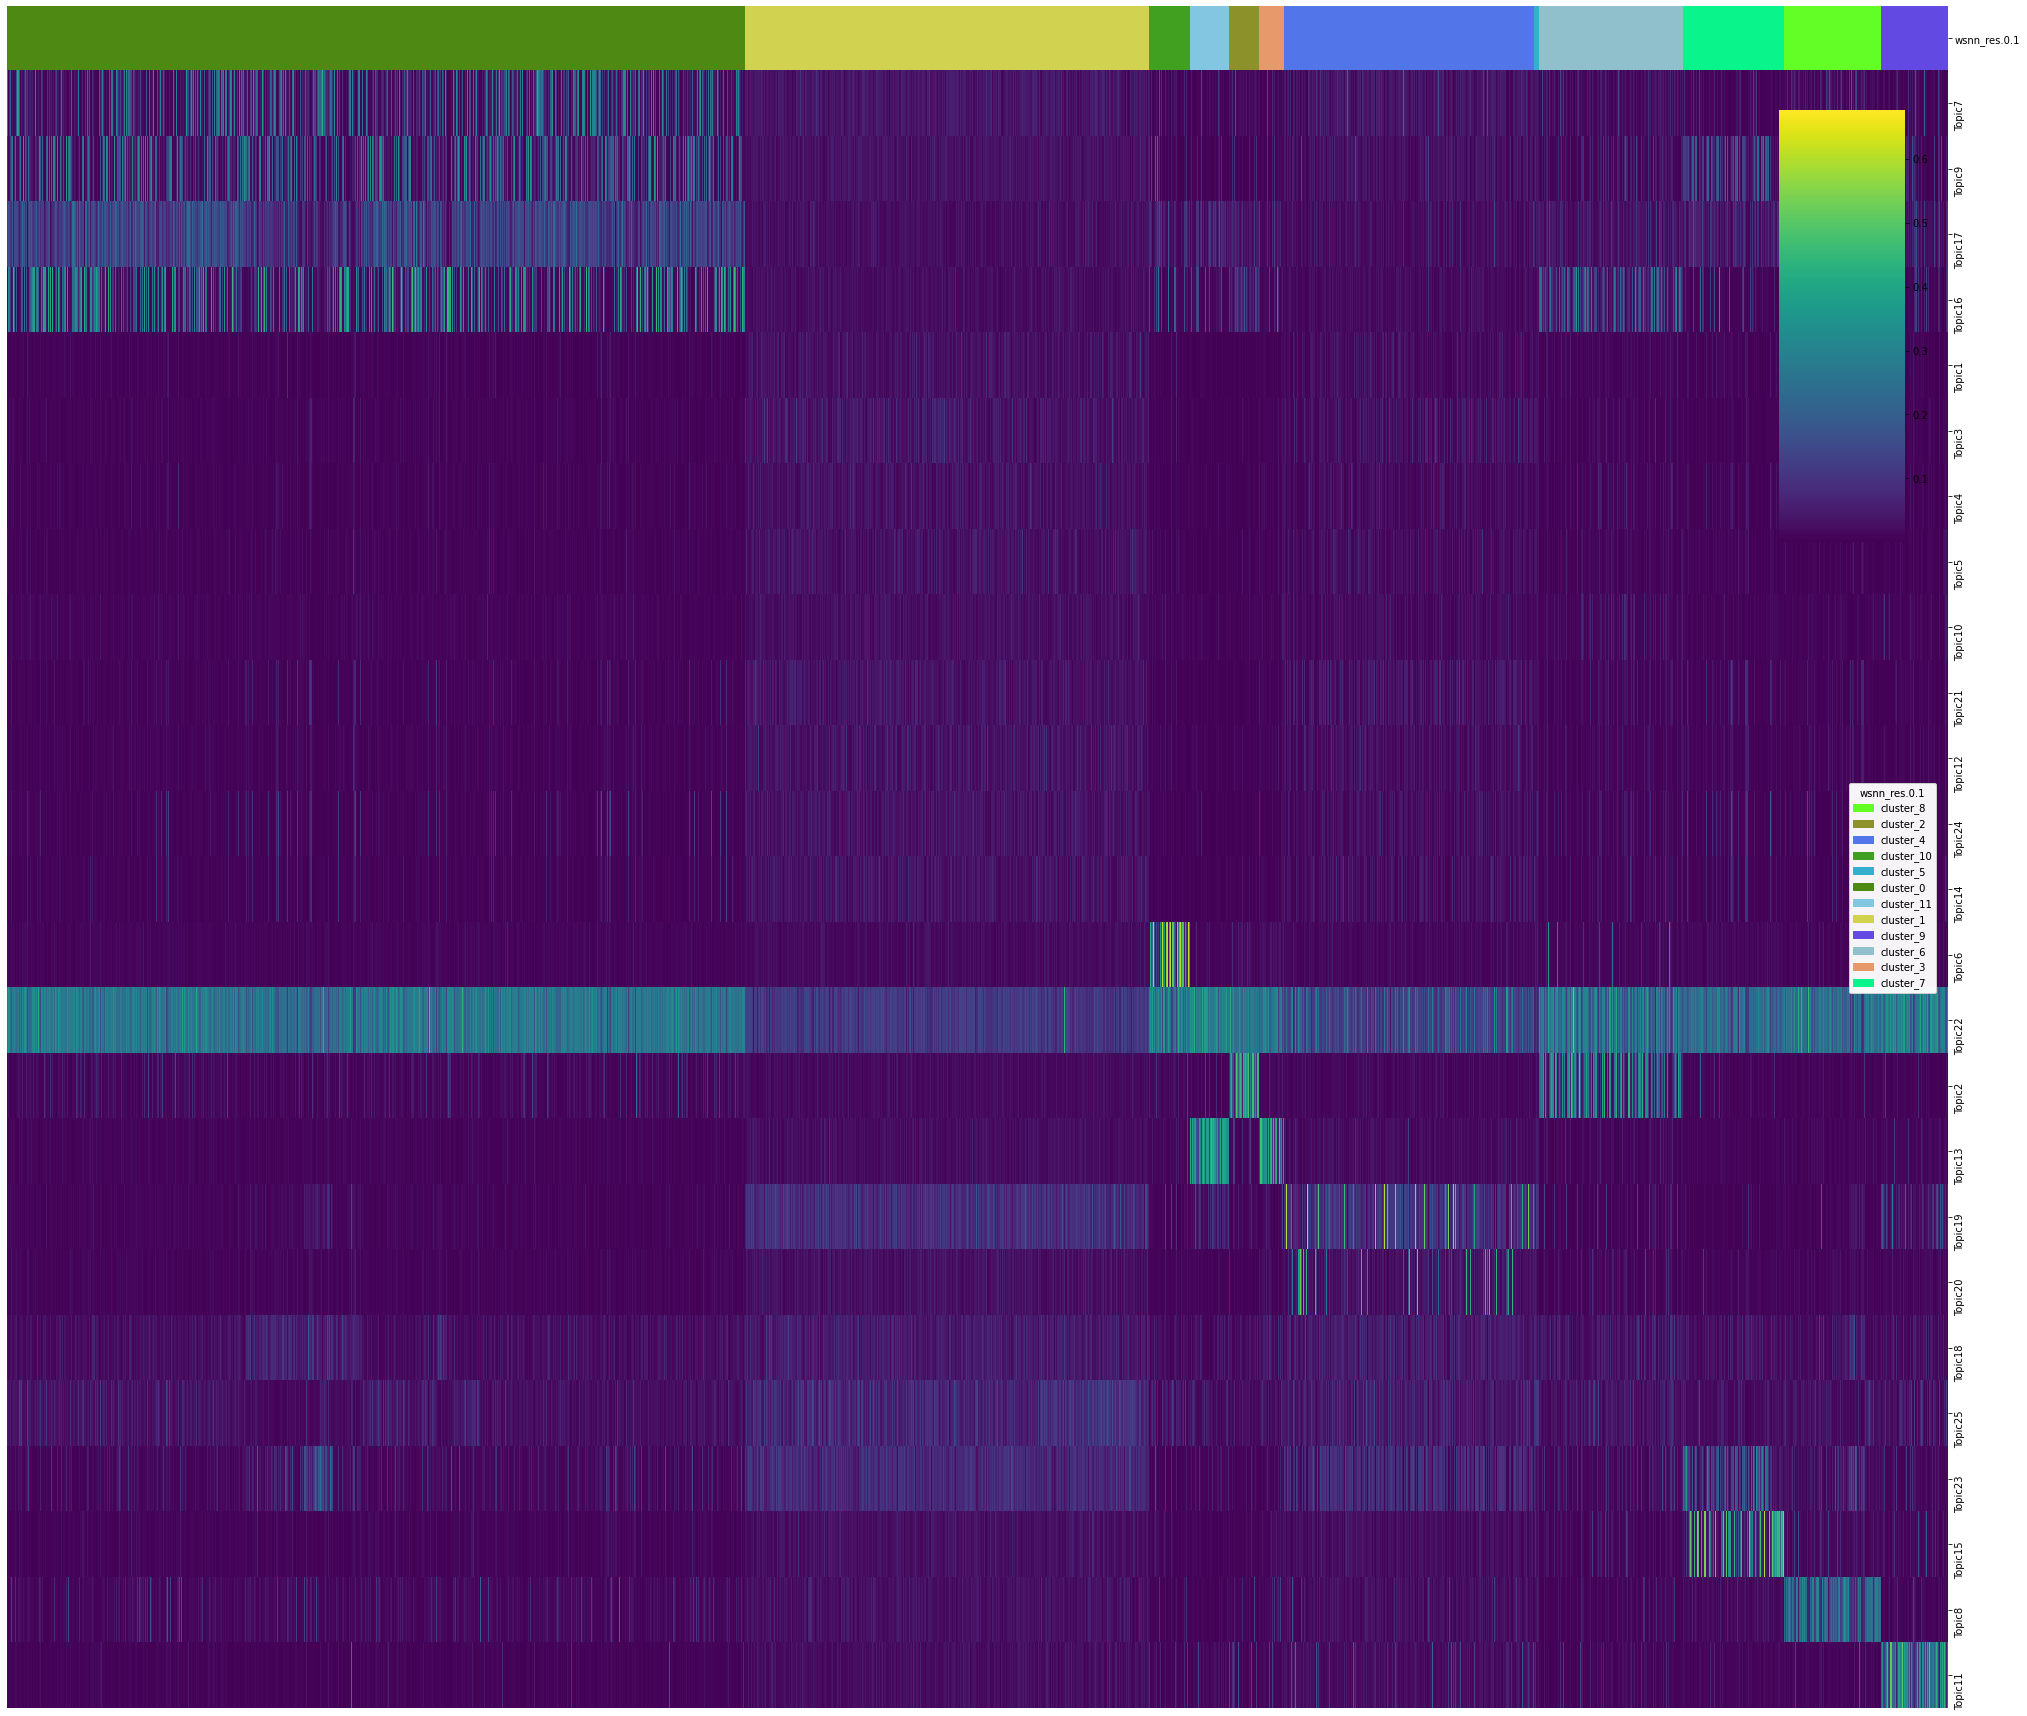

In [8]:
cell_topic_heatmap(cistopic_obj,
                     variables = ['wsnn_res.0.1'],
                     scale = False,
                     legend_loc_x = 0.9,
                     legend_loc_y = -0.8,
                     figsize=(35,30),
                     save = outDir + 'visualization/heatmap_topic_contr.pdf')

In [9]:
# Save
with open(outDir + 'cisTopicObject_noDBL.pkl', 'wb') as f:
  pickle.dump(cistopic_obj, f)


In [10]:
cistopic_obj.cell_data

,Dupl_nr_frag,wsnn_res.1.2,nCount_SCT,wsnn_res.0.4,cisTopic_log_nr_frag,wsnn_res.0.2,wsnn_res.1.1,wsnn_res.1.3,Predicted_doublets_fragments,Log_total_nr_frag,...,seurat_clusters,wsnn_res.1.6,Doublet_scores_fragments,wsnn_res.2,pycisTopic_leiden_10_1.2,Seurat_RNA+ATAC_leiden_100_0.1,Seurat_RNA+ATAC_leiden_100_0.2,Seurat_RNA+ATAC_leiden_100_0.5,Seurat_RNA+ATAC_leiden_100_0.8,Seurat_RNA+ATAC_leiden_100_1.2
CCTATTTAGGGATTAG-1-6dpf___6dpf,21180,NaN,NaN,NaN,3.944927,NaN,NaN,NaN,False,4.762468,...,NaN,NaN,0.171355,NaN,11,NaN,NaN,NaN,NaN,NaN
AGGAACCAGTAACCCG-1-6dpf___6dpf,3280,cluster_26,2451.0,cluster_1,3.41162,cluster_0,cluster_26,cluster_27,False,3.941362,...,cluster_5,cluster_29,0.171355,cluster_31,2,1,1,2,2,2
GCTGGTTCAGTTTACG-1-6dpf___6dpf,25519,cluster_30,2142.0,cluster_21,4.271633,cluster_15,cluster_30,cluster_31,False,4.792700,...,cluster_8,cluster_32,0.193277,cluster_34,12,2,4,4,5,5
AGGTTAGAGGGCCATC-1-6dpf___6dpf,5595,cluster_26,1402.0,cluster_1,3.609381,cluster_0,cluster_26,cluster_27,False,4.193152,...,cluster_5,cluster_29,0.219814,cluster_31,10,1,1,2,2,2
GGTTTAATCCCGCATT-1-6dpf___6dpf,6531,cluster_10,2372.0,cluster_6,3.649335,cluster_11,cluster_10,cluster_10,False,4.240998,...,cluster_24,cluster_10,0.219814,cluster_17,10,1,1,2,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGGTTTGTCCCGTTAC-1-2dpf___2dpf,2667,NaN,NaN,NaN,2.612784,NaN,NaN,NaN,False,3.573452,...,NaN,NaN,0.042017,NaN,1,NaN,NaN,NaN,NaN,NaN
TGACCAAGTTGCACAA-1-2dpf___2dpf,2585,cluster_0,1807.0,cluster_0,2.592177,cluster_1,cluster_0,cluster_0,False,3.554973,...,cluster_0,cluster_0,0.094629,cluster_0,1,0,0,0,0,0
CAAACGCGTGCGCGTA-1-2dpf___2dpf,2132,cluster_12,1425.0,cluster_12,2.656098,cluster_9,cluster_12,cluster_12,False,3.524266,...,cluster_2,cluster_12,0.090307,cluster_12,1,0,0,0,1,1
CTATAACCAAGCTTAT-1-2dpf___2dpf,3305,NaN,NaN,NaN,2.706718,NaN,NaN,NaN,False,3.673205,...,NaN,NaN,0.064295,NaN,1,NaN,NaN,NaN,NaN,NaN


In [11]:
# Load processed scRNA-seq data
import pandas as pd
infile = '../Seurat_obj_PCs.txt'
rna_pca = pd.read_csv(infile, sep='\t')
barcodes_names=list(rna_pca.index)
samples_names=list(rna_pca.index)
rna_pca['barcodes_names']=barcodes_names
barcodes=[re.sub(r"(.)df_(.+)",'\\2-\\1dpf___\\1dpf',x)for x in barcodes_names]


In [12]:
samples_ids=[re.sub(r"(.)df_.+",'\\1dpf___\\1dpf',x)for x in samples_names]
rna_pca['barcodes']=barcodes
rna_pca.index = list(rna_pca['barcodes'])
rna_pca=rna_pca.drop(columns=['barcodes_names','barcodes'])

In [13]:
set(samples_ids)
set(rna_pca.index)
rna_pca

CountFrequency(samples_ids)


#CountFrequency(cistopic_obj.cell_data['barcodes_names'])

2dpf___2dpf :  5132
4dpf___4dpf :  1911
6dpf___6dpf :  4880


In [14]:

from pycisTopic.clust_vis import *
find_clusters(cistopic_obj, k=100, rna_components=rna_pca,
              rna_weight = 0.2, res = [0.1,0.2,0.5,0.8,1.2], 
              prefix='Seurat_RNA+ATAC_', split_pattern='-')


2024-04-04 02:53:17,474 cisTopic     INFO     Finding neighbours
2024-04-04 02:53:20,514 cisTopic     INFO     Finding clusters

Columns ['Seurat_RNA+ATAC_leiden_100_0.1'] will be overwritten

Columns ['Seurat_RNA+ATAC_leiden_100_0.2'] will be overwritten

Columns ['Seurat_RNA+ATAC_leiden_100_0.5'] will be overwritten

Columns ['Seurat_RNA+ATAC_leiden_100_0.8'] will be overwritten

Columns ['Seurat_RNA+ATAC_leiden_100_1.2'] will be overwritten


In [15]:
run_umap(cistopic_obj, rna_components=rna_pca, rna_weight = 0.8, reduction_name='Seurat_RNA+ATAC_UMAP')


2024-04-04 02:53:25,304 cisTopic     INFO     Running UMAP


In [16]:
cistopic_obj.cell_data.columns

Index(['SCT.weight', 'nFeature_RNA', 'Dupl_nr_frag',
       'Seurat_RNA+ATAC_leiden_100_0.8', 'orig.ident', 'wsnn_res.0.2',
       'wsnn_res.0.8', 'cisTopic_nr_frag', 'Unique_nr_frag', 'clusters',
       'wsnn_res.1.6', 'wsnn_res.0.9', 'pycisTopic_leiden_10_1.2',
       'cisTopic_log_nr_frag', 'Predicted_doublets_fragments', 'wsnn_res.1.9',
       'nFeature_SCT', 'nCount_SCT', 'wsnn_res.1.7', 'wsnn_res.0.4',
       'wsnn_res.1.5', 'Log_unique_nr_frag', 'Seurat_RNA+ATAC_leiden_100_0.2',
       'seurat_clusters', 'cellnames', 'cisTopic_nr_acc', 'nFeature_ATAC',
       'Doublet_scores_fragments', 'cisTopic_log_nr_acc', 'barcodes',
       'Total_nr_frag', 'wsnn_res.1.8', 'wsnn_res.1.2', 'wsnn_res.1.1',
       'Seurat_RNA+ATAC_leiden_100_0.1', 'nCount_RNA', 'sample_id',
       'condition', 'percent.mt', 'wsnn_res.0.1', 'barcodes_names',
       'Log_total_nr_frag', 'wsnn_res.0.7', 'wsnn_res.1', 'wsnn_res.2',
       'wsnn_res.0.5', 'wsnn_res.1.4', 'wsnn_res.0.3', 'FRIP', 'nCount_ATAC',
      

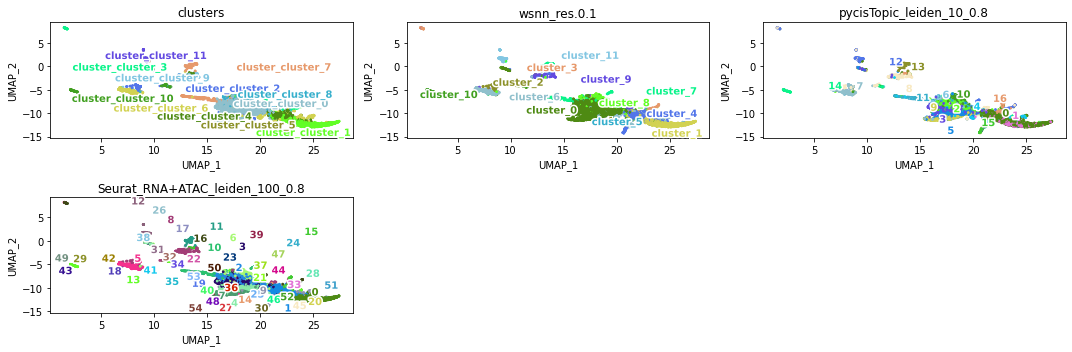

In [17]:
plot_metadata(cistopic_obj,
                 reduction_name='Seurat_RNA+ATAC_UMAP',
                 variables=['clusters','wsnn_res.0.1', 'pycisTopic_leiden_10_0.8','Seurat_RNA+ATAC_leiden_100_0.8'], # Labels from RNA and new clusters
                 target='cell', num_columns=3,
                 text_size=10,
                 dot_size=3,
                 figsize=(15,5),
                 save= outDir + 'visualization/dimensionality_reduction_Seurat_RNA_ATAC.pdf')


# split per sample (day)

<Figure size 2880x720 with 0 Axes>

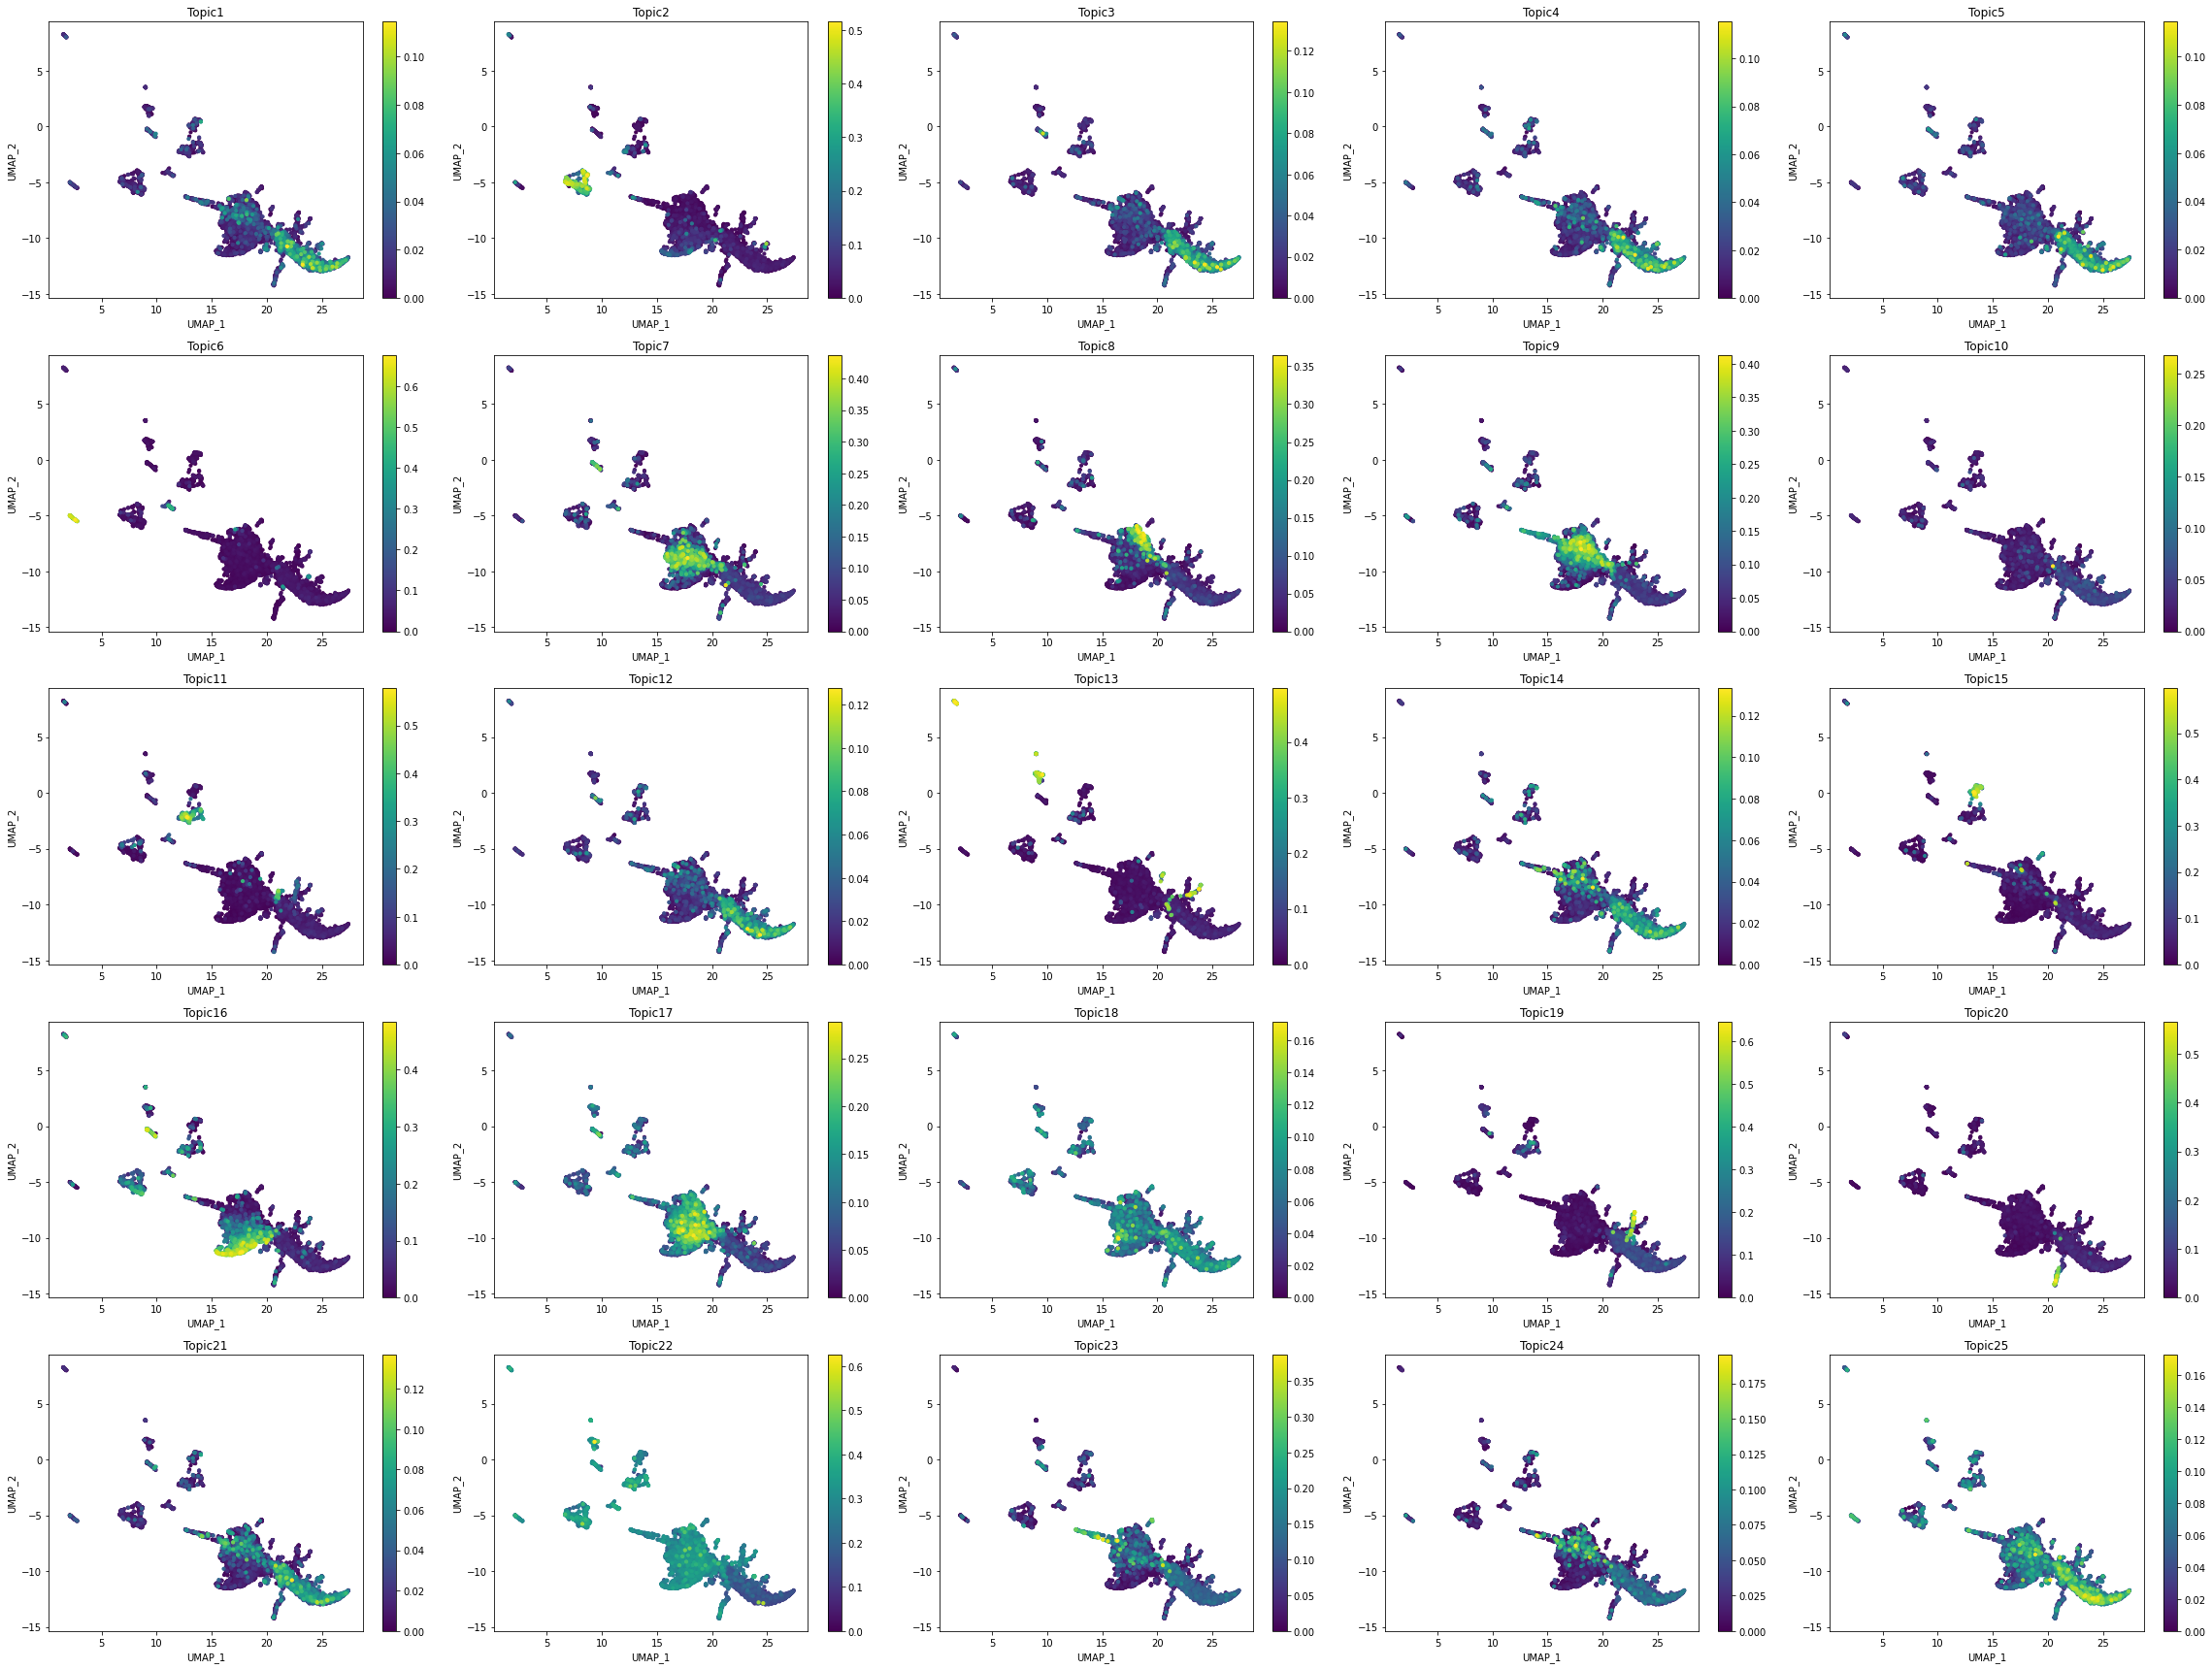

In [18]:
fig=plt.figure(figsize=(40,10))
plot_topic(cistopic_obj, reduction_name='Seurat_RNA+ATAC_UMAP', num_columns=5)
# Plot barcode stats in one figure
fig.savefig(outDir + 'visualization//Topic_UMAP.pdf', bbox_inches='tight')

In [19]:
with open(outDir + 'cisTopicObject_noDBL.pkl', 'wb') as f:
  pickle.dump(cistopic_obj, f)

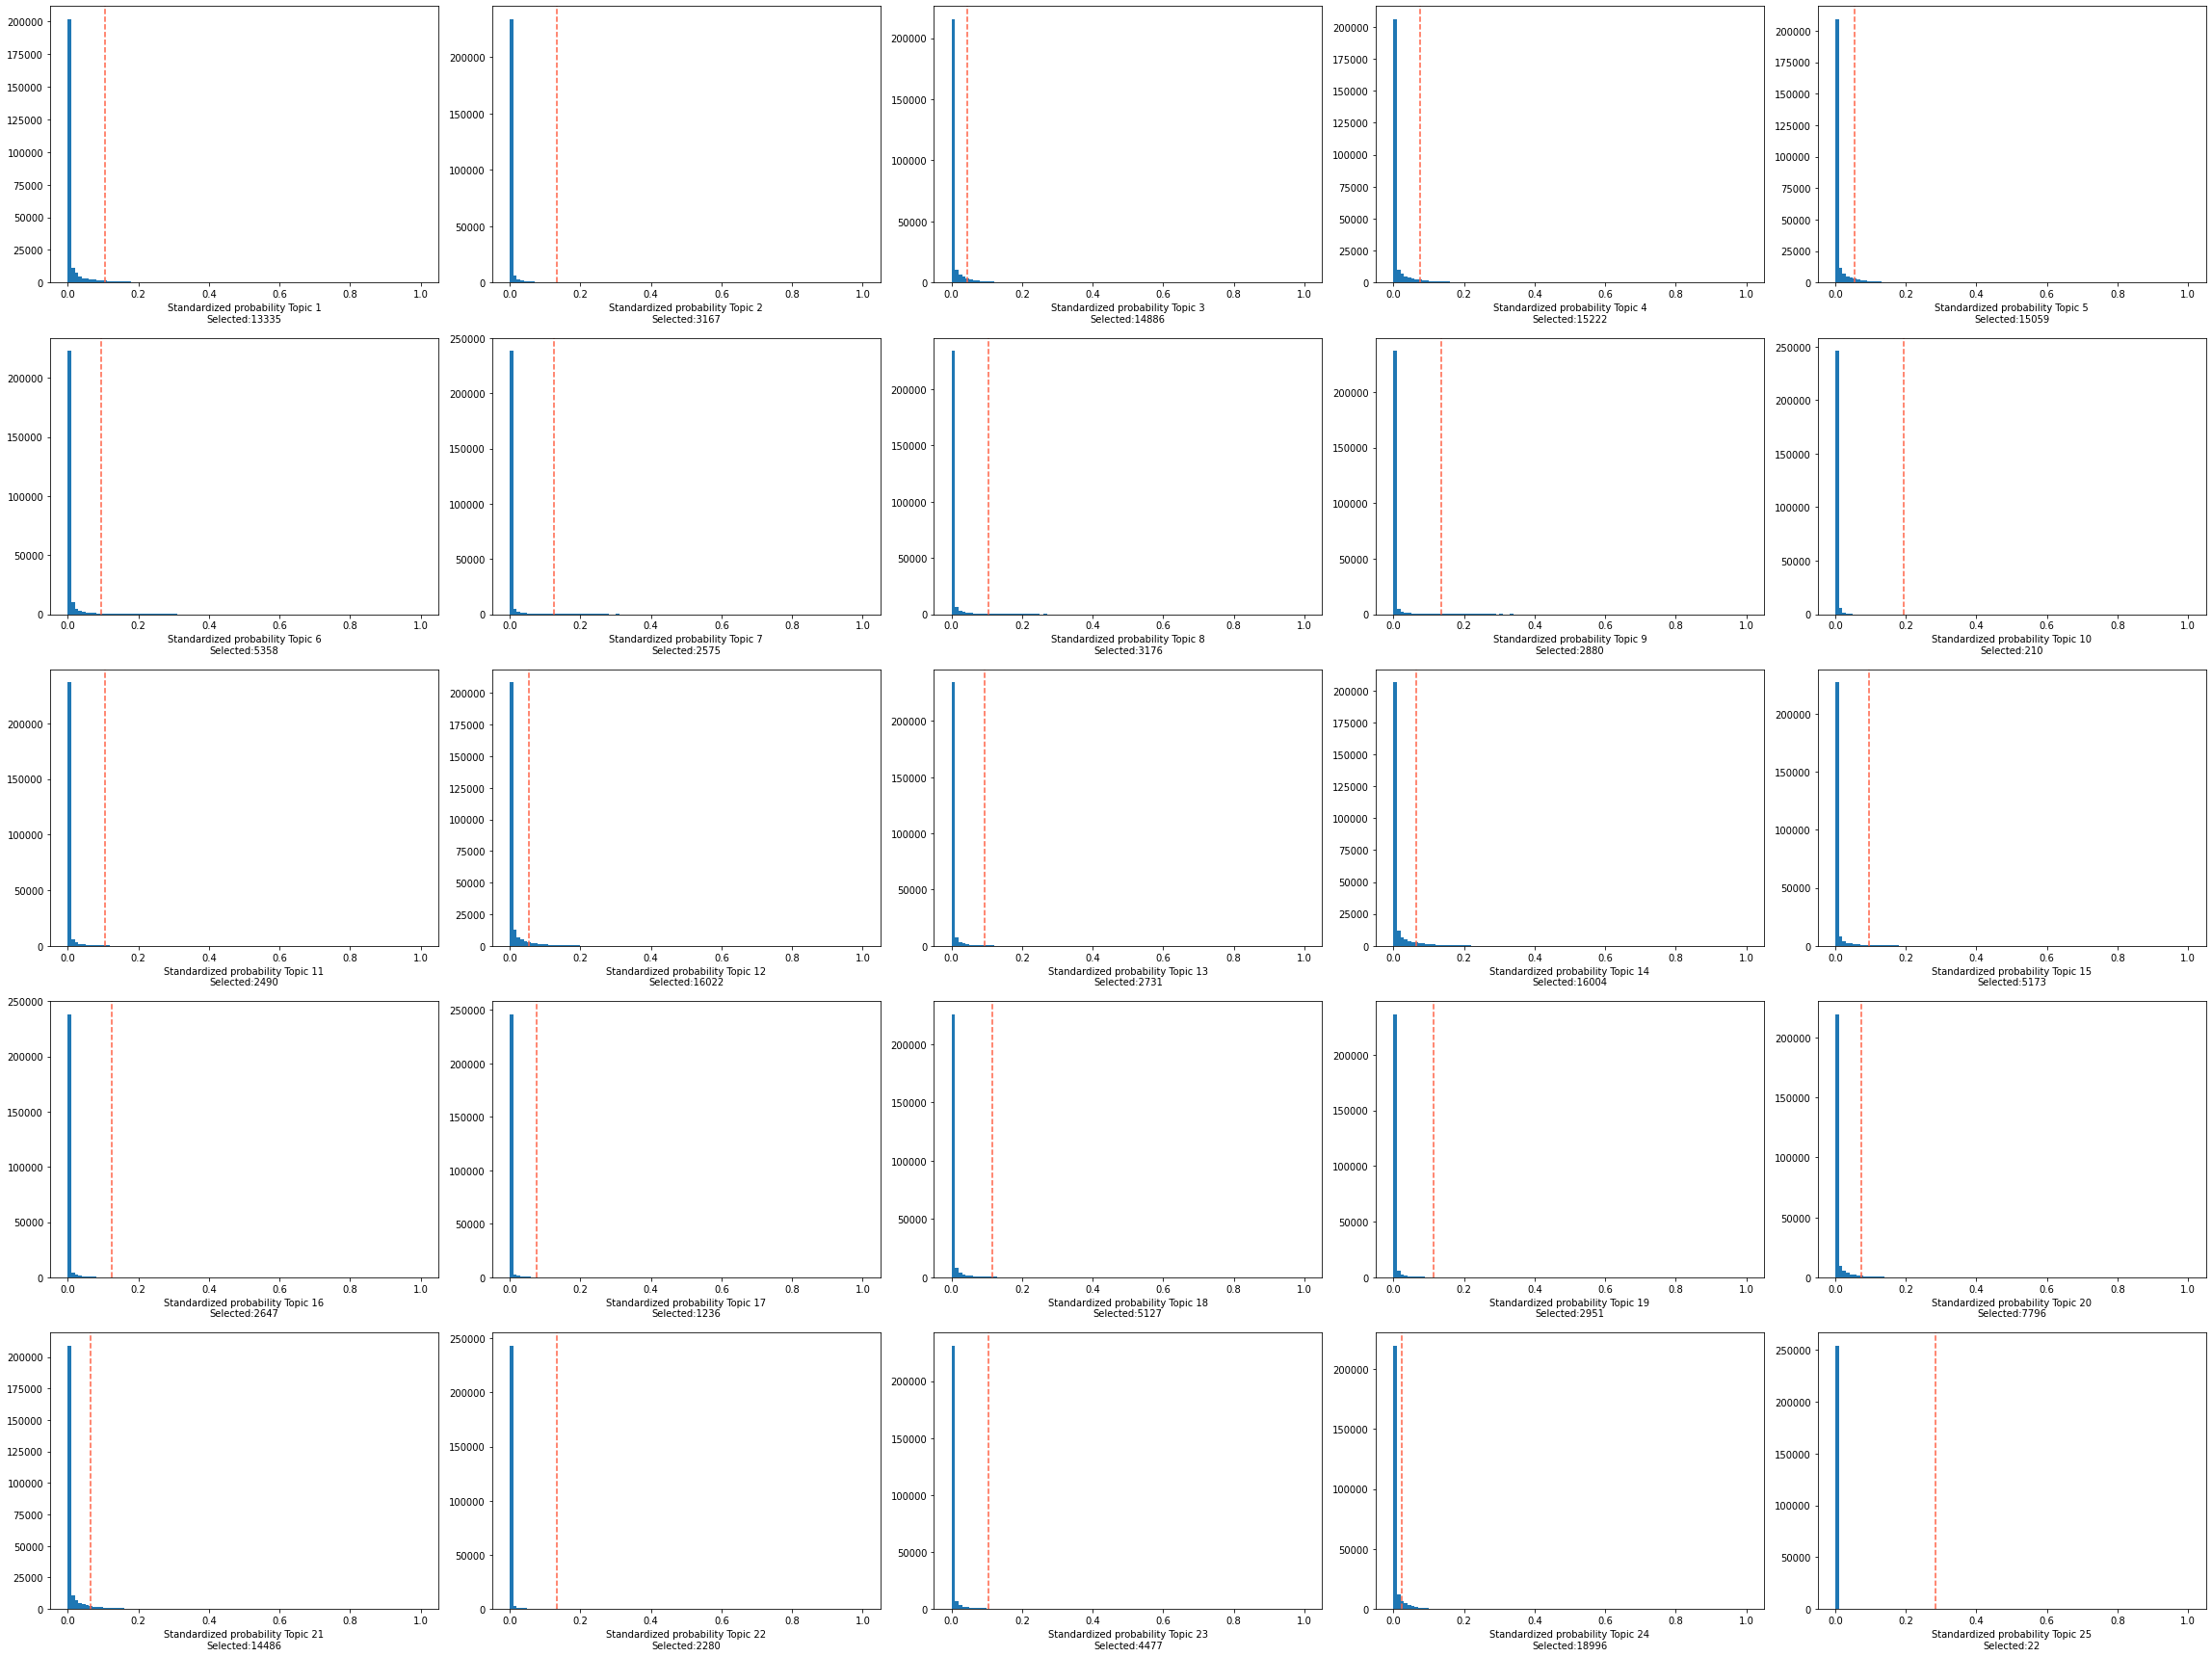

In [20]:
#os.mkdir(outDir+'topic_binarization')
from pycisTopic.topic_binarization import *
region_bin_topics = binarize_topics(cistopic_obj, method='otsu', ntop=3000, plot=True, num_columns=5, save= outDir + 'topic_binarization/otsu.pdf')

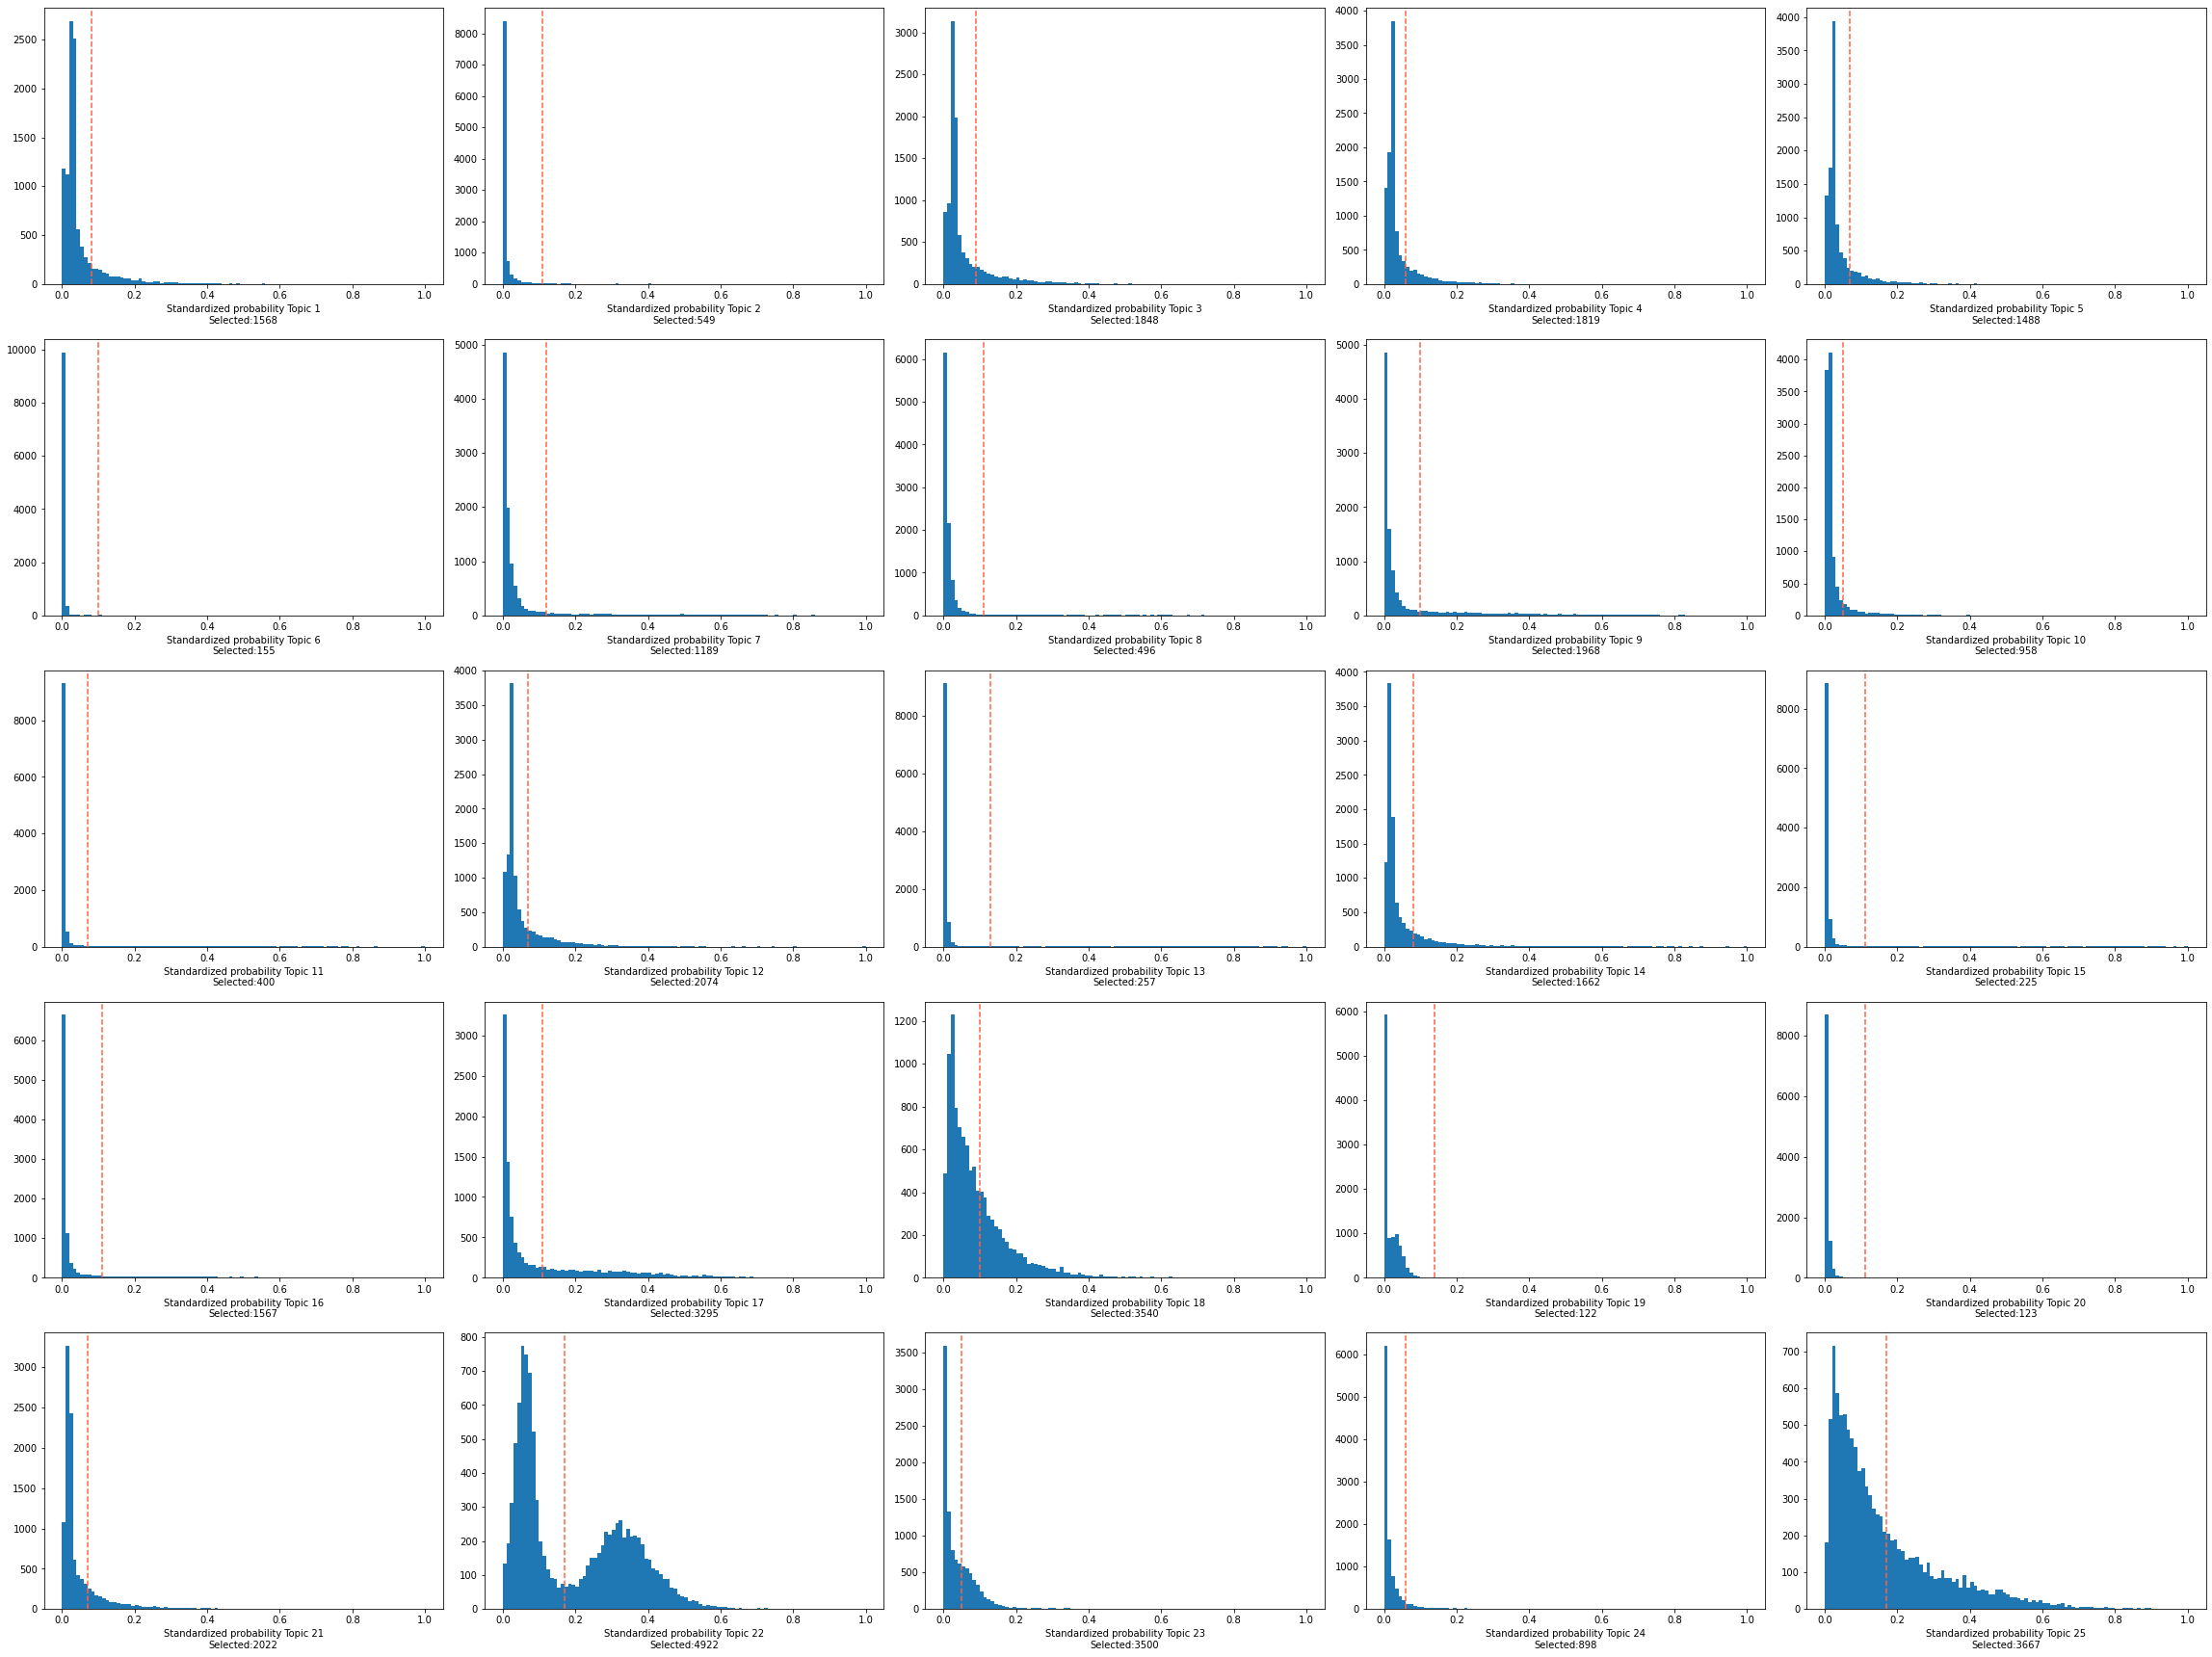

In [21]:
binarized_cell_topic = binarize_topics(cistopic_obj, target='cell', method='li', plot=True, num_columns=5, nbins=100)


In [22]:
#We see that some thresholds are not very accurate. We can adjust the manually.
#predefined_thr={'Topic16':0.8,}
#binarized_cell_topic = binarize_topics(cistopic_obj, target='cell', method='li', plot=True, num_columns=5, nbins=100, predefined_thr=predefined_thr)

In [23]:
from pycisTopic.topic_qc import *
topic_qc_metrics = compute_topic_metrics(cistopic_obj)

In [24]:
fig_dict={}
fig_dict['CoherenceVSAssignments']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Log10_Assignments', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['AssignmentsVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Log10_Assignments', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSCells_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Cells_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSRegions_in_bin']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Regions_in_binarized_topic', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSMarginal_dist']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Marginal_topic_dist', var_color='Gini_index', plot=False, return_fig=True)
fig_dict['CoherenceVSGini_index']=plot_topic_qc(topic_qc_metrics, var_x='Coherence', var_y='Gini_index', var_color='Gini_index', plot=False, return_fig=True)

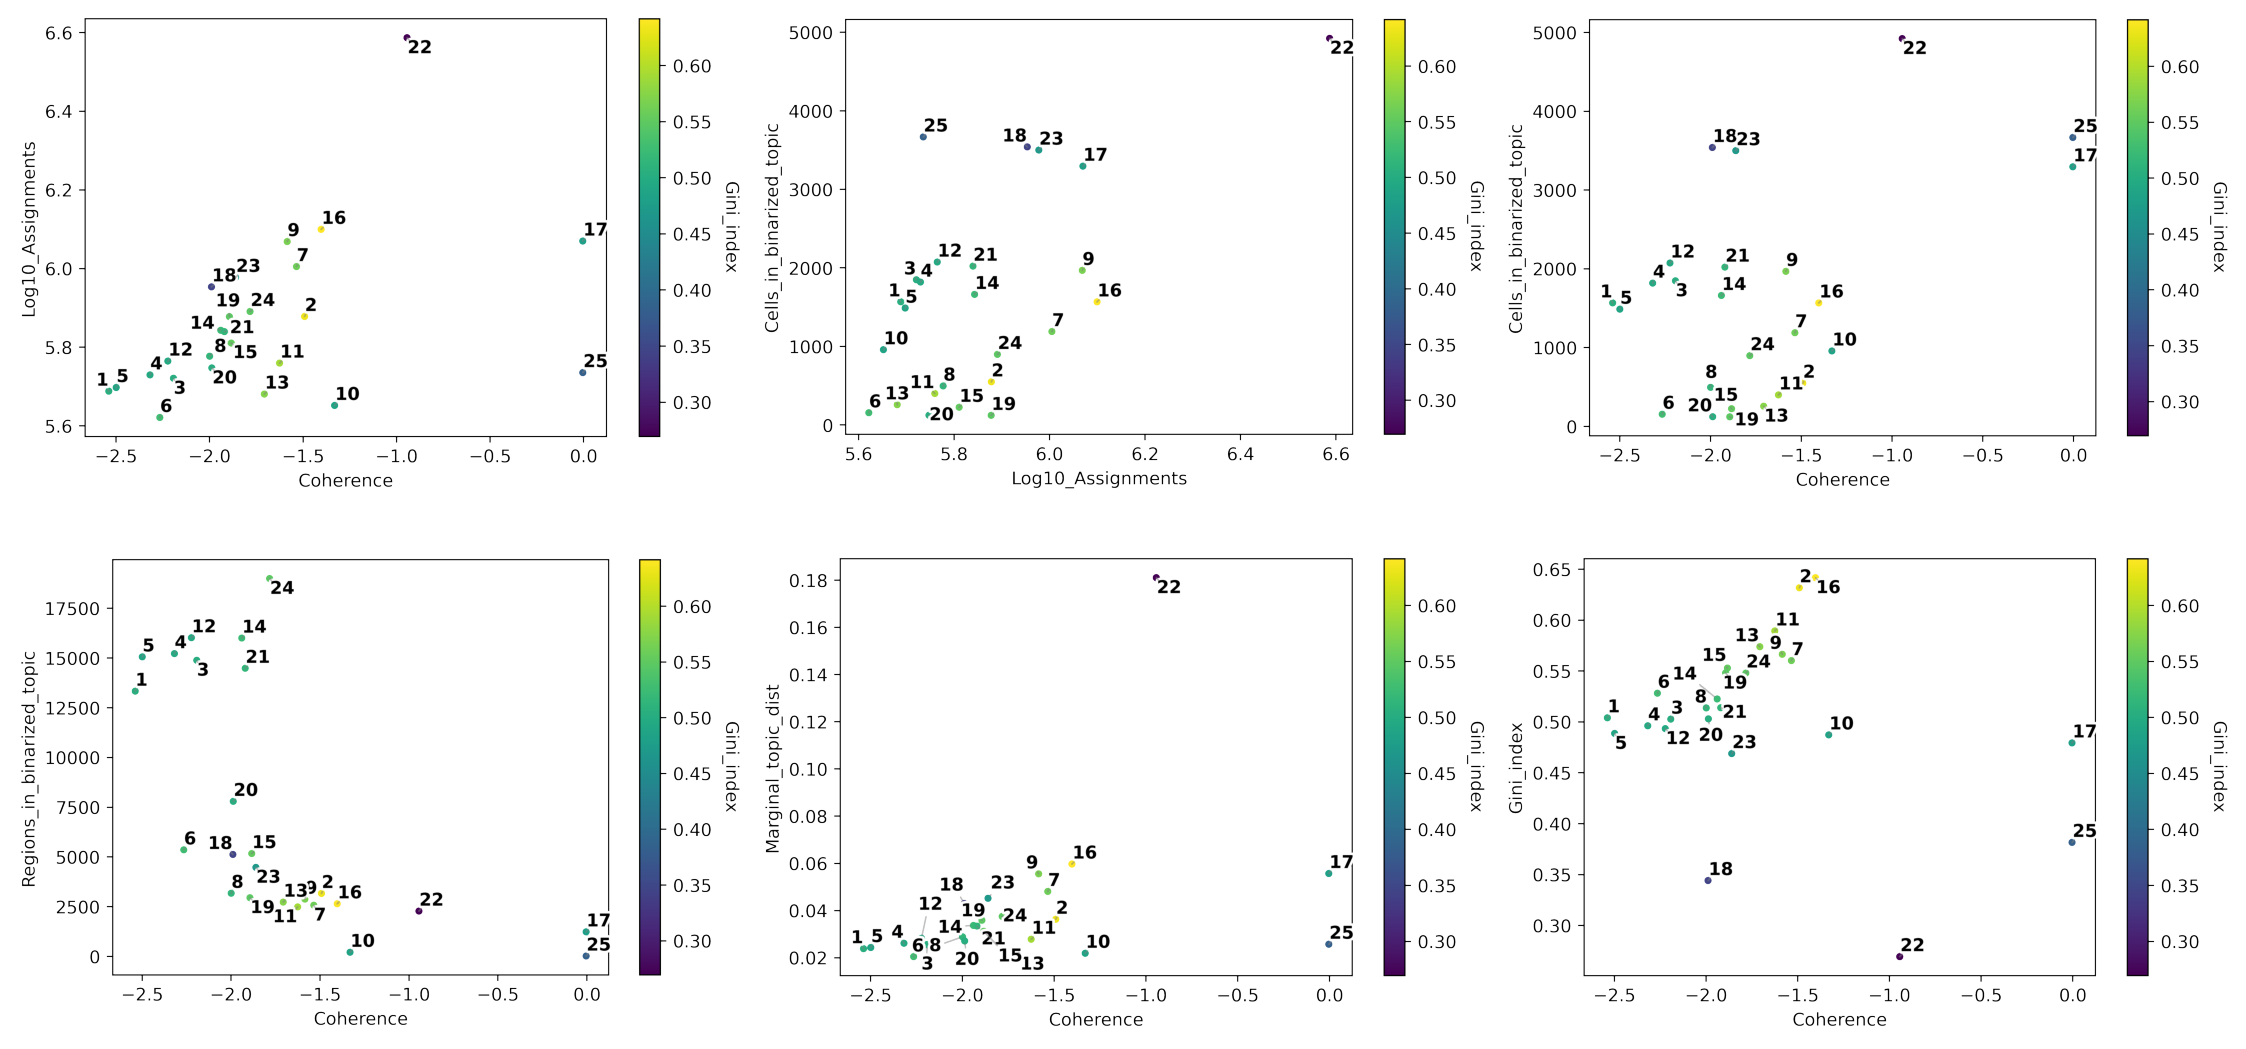

In [25]:
# gini index is cell type specific
# Plot topic stats in one figure
fig=plt.figure(figsize=(40, 43))
i = 1
for fig_ in fig_dict.keys():
    plt.subplot(2, 3, i)
    img = fig2img(fig_dict[fig_]) #To convert figures to png to plot together, see .utils.py. This converts the figure to png.
    plt.imshow(img)
    plt.axis('off')
    i += 1
plt.subplots_adjust(wspace=0, hspace=-0.70)
fig.savefig(outDir + 'topic_binarization/Topic_qc.pdf', bbox_inches='tight')
plt.show()

In [26]:
topic_annot = topic_annotation(cistopic_obj, annot_var='clusters', binarized_cell_topic=binarized_cell_topic, general_topic_thr = 0.2)


In [27]:
topic_annot


,clusters,Ratio_cells_in_topic,Ratio_group_in_population,is_general
Topic1,cluster_cluster_1,0.149205,0.153773,False
Topic2,"cluster_cluster_2, cluster_cluster_6",0.052241,0.066324,False
Topic3,"cluster_cluster_1, cluster_cluster_4",0.175849,0.249025,False
Topic4,cluster_cluster_1,0.17309,0.153773,False
Topic5,cluster_cluster_1,0.141593,0.153773,False
Topic6,cluster_cluster_10,0.014749,0.015701,False
Topic7,cluster_cluster_0,0.113141,0.281378,False
Topic8,cluster_cluster_8,0.047198,0.037111,False
Topic9,"cluster_cluster_8, cluster_cluster_0, cluster_...",0.187268,0.357027,False
Topic10,cluster_cluster_6,0.09116,0.05481,False


In [28]:
topic_qc_metrics = pd.concat([topic_annot[['clusters', 'Ratio_cells_in_topic', 'Ratio_group_in_population']], topic_qc_metrics], axis=1)


In [29]:
topic_qc_metrics


,clusters,Ratio_cells_in_topic,Ratio_group_in_population,Log10_Assignments,Assignments,Regions_in_binarized_topic,Cells_in_binarized_topic,Coherence,Marginal_topic_dist,Gini_index
Topic1,cluster_cluster_1,0.149205,0.153773,5.688313,487880,13335,1568,-2.538857,0.023855,0.504039
Topic2,"cluster_cluster_2, cluster_cluster_6",0.052241,0.066324,5.878170,755387,3167,549,-1.491867,0.036324,0.631748
Topic3,"cluster_cluster_1, cluster_cluster_4",0.175849,0.249025,5.721099,526137,14886,1848,-2.193021,0.025610,0.502743
Topic4,cluster_cluster_1,0.17309,0.153773,5.729668,536621,15222,1819,-2.318512,0.026155,0.496186
Topic5,cluster_cluster_1,0.141593,0.153773,5.697577,498399,15059,1488,-2.499361,0.024342,0.488707
Topic6,cluster_cluster_10,0.014749,0.015701,5.621450,418264,5358,155,-2.266009,0.020481,0.528185
Topic7,cluster_cluster_0,0.113141,0.281378,6.005001,1011581,2575,1189,-1.535259,0.048107,0.560211
Topic8,cluster_cluster_8,0.047198,0.037111,5.777166,598640,3176,496,-1.999575,0.028890,0.513738
Topic9,"cluster_cluster_8, cluster_cluster_0, cluster_...",0.187268,0.357027,6.068598,1171110,2880,1968,-1.584958,0.055558,0.566441
Topic10,cluster_cluster_6,0.09116,0.05481,5.652033,448779,210,958,-1.331413,0.021909,0.487249


In [30]:
# Save
with open(outDir + 'topic_binarization/Topic_qc_metrics_annot.pkl', 'wb') as f:
  pickle.dump(topic_qc_metrics, f)
with open(outDir + 'topic_binarization/binarized_cell_topic.pkl', 'wb') as f:
  pickle.dump(binarized_cell_topic, f)
with open(outDir + 'topic_binarization/binarized_topic_region.pkl', 'wb') as f:
  pickle.dump(region_bin_topics, f)

In [31]:
# Load cisTopic object
import pickle
infile = open(outDir + 'cisTopicObject_noDBL.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()

In [32]:
from pycisTopic.diff_features import *
imputed_acc_obj = impute_accessibility(cistopic_obj, selected_cells=None, selected_regions=None, scale_factor=10**6)


2024-04-04 02:56:09,355 cisTopic     INFO     Imputing region accessibility
2024-04-04 02:56:09,356 cisTopic     INFO     Impute region accessibility for regions 0-20000
2024-04-04 02:56:10,724 cisTopic     INFO     Impute region accessibility for regions 20000-40000
2024-04-04 02:56:11,818 cisTopic     INFO     Impute region accessibility for regions 40000-60000
2024-04-04 02:56:12,913 cisTopic     INFO     Impute region accessibility for regions 60000-80000
2024-04-04 02:56:14,028 cisTopic     INFO     Impute region accessibility for regions 80000-100000
2024-04-04 02:56:15,116 cisTopic     INFO     Impute region accessibility for regions 100000-120000
2024-04-04 02:56:16,504 cisTopic     INFO     Impute region accessibility for regions 120000-140000
2024-04-04 02:56:22,750 cisTopic     INFO     Impute region accessibility for regions 140000-160000
2024-04-04 02:56:26,360 cisTopic     INFO     Impute region accessibility for regions 160000-180000
2024-04-04 02:56:30,509 cisTopic     

In [33]:
normalized_imputed_acc_obj = normalize_scores(imputed_acc_obj, scale_factor=10**4)


2024-04-04 02:56:42,597 cisTopic     INFO     Normalizing imputed data
2024-04-04 02:58:02,750 cisTopic     INFO     Done!


2024-04-04 02:59:12,074 cisTopic     INFO     Calculating mean
2024-04-04 02:59:14,723 cisTopic     INFO     Calculating variance


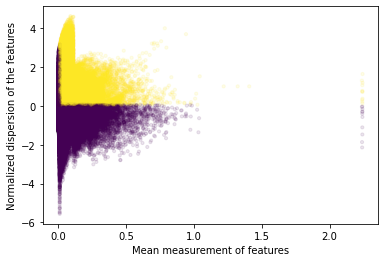

2024-04-04 03:00:31,524 cisTopic     INFO     Done!


In [35]:
os.mkdir(outDir+'DARs')
variable_regions = find_highly_variable_features(normalized_imputed_acc_obj,
                                           min_disp = 0.05,
                                           min_mean = 0.0125,
                                           max_mean = 3,
                                           max_disp = np.inf,
                                           n_bins=20,
                                           n_top_features=None,
                                           plot=True,
                                           save= outDir + 'DARs/HVR_plot.pdf')

In [36]:
len(variable_regions)


78336

In [37]:
cistopic_obj.cell_data

,SCT.weight,nFeature_RNA,Dupl_nr_frag,Seurat_RNA+ATAC_leiden_100_0.8,orig.ident,wsnn_res.0.2,wsnn_res.0.8,cisTopic_nr_frag,Unique_nr_frag,clusters,...,Seurat_RNA+ATAC_leiden_100_0.5,Dupl_rate,ATAC.weight,pycisTopic_leiden_10_0.6,Unique_nr_frag_in_regions,TSS_enrichment,Total_nr_frag_in_regions,barcode,wsnn_res.0.6,Seurat_RNA+ATAC_leiden_100_1.2
CCTATTTAGGGATTAG-1-6dpf___6dpf,NaN,NaN,21180,NaN,NaN,NaN,NaN,8809,36692,NaN,...,NaN,0.365980,NaN,2,7727,3.314314,12037,CCTATTTAGGGATTAG-1,NaN,NaN
AGGAACCAGTAACCCG-1-6dpf___6dpf,0.453839,1339.0,3280,2,6dpf,cluster_0,cluster_22,2580,5457,cluster_cluster_0,...,2,0.375415,0.546161,4,1872,3.531245,2995,AGGAACCAGTAACCCG-1,cluster_1,2
GCTGGTTCAGTTTACG-1-6dpf___6dpf,0.999983,3983.0,25519,5,6dpf,cluster_15,cluster_27,18691,36525,cluster_cluster_6,...,4,0.411305,0.000017,3,11326,3.056762,18904,GCTGGTTCAGTTTACG-1,cluster_23,5
AGGTTAGAGGGCCATC-1-6dpf___6dpf,0.476799,249.0,5595,2,6dpf,cluster_0,cluster_22,4068,10006,cluster_cluster_0,...,2,0.358631,0.523201,5,3569,6.522738,5610,AGGTTAGAGGGCCATC-1,cluster_1,2
GGTTTAATCCCGCATT-1-6dpf___6dpf,0.569405,1250.0,6531,2,6dpf,cluster_11,cluster_9,4460,10887,cluster_cluster_8,...,2,0.374957,0.430595,5,3264,3.268621,5201,GGTTTAATCCCGCATT-1,cluster_7,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GGGTTTGTCCCGTTAC-1-2dpf___2dpf,NaN,NaN,2667,NaN,NaN,NaN,NaN,410,1078,NaN,...,NaN,0.712150,NaN,0,328,2.248607,1106,GGGTTTGTCCCGTTAC-1,NaN,NaN
TGACCAAGTTGCACAA-1-2dpf___2dpf,0.519119,711.0,2585,0,2dpf,cluster_1,cluster_0,391,1004,cluster_cluster_1,...,0,0.720256,0.480881,0,289,5.615000,1062,TGACCAAGTTGCACAA-1,cluster_0,0
CAAACGCGTGCGCGTA-1-2dpf___2dpf,0.560067,336.0,2132,1,2dpf,cluster_9,cluster_12,453,1212,cluster_cluster_4,...,0,0.637560,0.439933,0,371,4.406562,1057,CAAACGCGTGCGCGTA-1,cluster_12,1
CTATAACCAAGCTTAT-1-2dpf___2dpf,NaN,NaN,3305,NaN,NaN,NaN,NaN,509,1407,NaN,...,NaN,0.701401,NaN,0,404,3.581520,1349,CTATAACCAAGCTTAT-1,NaN,NaN


In [38]:

# what genes in the accesible regions are most variables
markers_dict= find_diff_features(cistopic_obj,
                      imputed_acc_obj,
                      variable='wsnn_res.0.1',
                      var_features=variable_regions,
                      contrasts=None,
                      adjpval_thr=0.05,
                      log2fc_thr=np.log2(1.5),
                      n_cpu=5,
                      _temp_dir=tmpDir + 'ray_spill',
                      split_pattern = '-')

2024-04-04 03:01:13,155 root         INFO     Unable to poll TPU GCE metadata: HTTPConnectionPool(host='metadata.google.internal', port=80): Max retries exceeded with url: /computeMetadata/v1/instance/attributes/accelerator-type (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7f2c9c34cd60>: Failed to establish a new connection: [Errno -2] Name or service not known'))


2024-04-04 03:01:14,909	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


2024-04-04 03:01:16,131 cisTopic     INFO     Subsetting data for cluster_0 (2957 of 10509)
2024-04-04 03:01:21,843 cisTopic     INFO     Computing p-value for cluster_0
2024-04-04 03:01:37,780 cisTopic     INFO     Computing log2FC for cluster_0
2024-04-04 03:01:39,224 cisTopic     INFO     cluster_0 done!
2024-04-04 03:01:39,230 cisTopic     INFO     Subsetting data for cluster_1 (1616 of 10509)
2024-04-04 03:01:39,397 cisTopic     INFO     Computing p-value for cluster_1
2024-04-04 03:01:53,411 cisTopic     INFO     Computing log2FC for cluster_1
2024-04-04 03:01:53,527 cisTopic     INFO     cluster_1 done!
2024-04-04 03:01:53,621 cisTopic     INFO     Subsetting data for cluster_10 (165 of 10509)
2024-04-04 03:01:53,766 cisTopic     INFO     Computing p-value for cluster_10
2024-04-04 03:02:08,336 cisTopic     INFO     Computing log2FC for cluster_10
2024-04-04 03:02:08,443 cisTopic     INFO     cluster_10 done!
2024-04-04 03:02:08,536 cisTopic     INFO     Subsetting data for clus

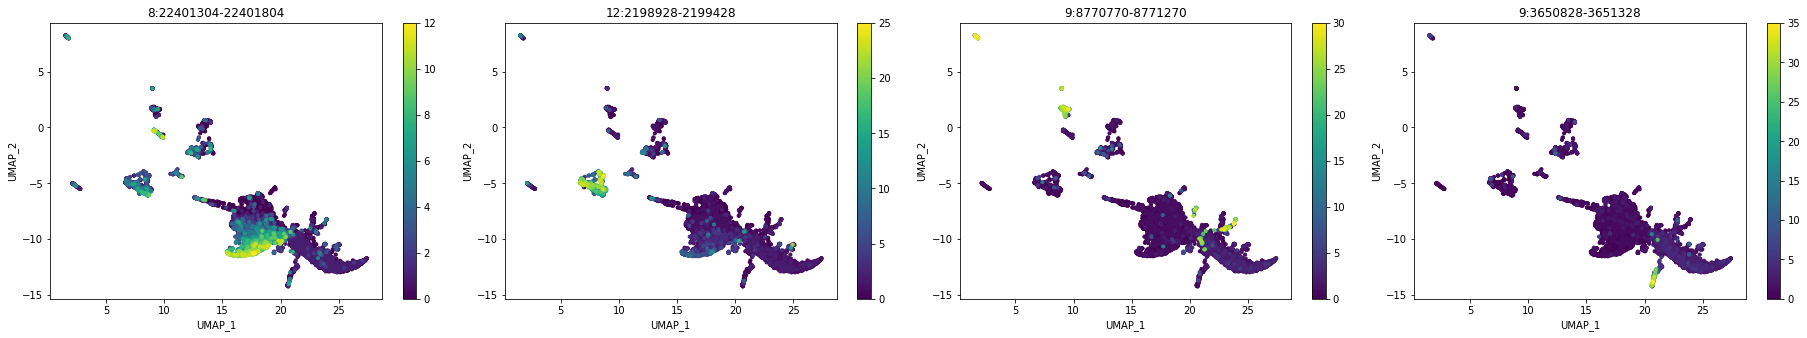

In [39]:
# differentially express regions
from pycisTopic.clust_vis import *
plot_imputed_features(cistopic_obj,
                    reduction_name='Seurat_RNA+ATAC_UMAP',
                    imputed_data=imputed_acc_obj,
                    features=[markers_dict[x].index.tolist()[0] for x in ['cluster_0', 'cluster_2', 'cluster_3', 'cluster_4']],
                    scale=False,
                    num_columns=4,
                    selected_cells = cistopic_obj.projections['cell']['Seurat_RNA+ATAC_UMAP'].index.tolist(),
                    save= outDir + 'DARs/example_best_DARs.pdf')

In [40]:
x = [print(x + ': '+ str(len(markers_dict[x]))) for x in markers_dict.keys()]


cluster_0: 12442
cluster_1: 34928
cluster_10: 11494
cluster_11: 11406
cluster_2: 10541
cluster_3: 11843
cluster_4: 31892
cluster_5: 26885
cluster_6: 9757
cluster_7: 13813
cluster_8: 8740
cluster_9: 10353


In [41]:
# Save
with open(outDir + 'DARs/Imputed_accessibility.pkl', 'wb') as f:
  pickle.dump(imputed_acc_obj, f)
with open(outDir + 'DARs/DARs.pkl', 'wb') as f:
  pickle.dump(markers_dict, f)

In [3]:
import pickle
infile = open(outDir + 'cisTopicObject_noDBL.pkl', 'rb')
cistopic_obj = pickle.load(infile)
infile.close()
# Load imputed accessibility
import pickle
infile = open(outDir + 'DARs/Imputed_accessibility.pkl', 'rb')
imputed_acc_obj = pickle.load(infile)
infile.close()
# Load DARs
import pickle
infile = open(outDir + 'DARs/DARs.pkl', 'rb')
DARs_dict = pickle.load(infile)
infile.close()